In [2]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn

/Users/colingerber/anaconda/lib/python2.7/site-packages/pytz-2013b-py2.7.egg/pytz/__init__.py:35: UserWarning: Module argparse was already imported from /Users/colingerber/anaconda/lib/python2.7/argparse.pyc, but /Users/colingerber/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [4]:
#import data
df = pd.read_excel('All_Isotopes_Generated.xlsx', 'Sheet1')

needed_isotopes = ['Reactor', 'Enrichment', 'u234', 'u235', 'u236', 'u238',
                   'pu238', 'pu239', 'pu240', 'pu241', 'pu242']
                   
df = df[needed_isotopes]

# split data table into data X and class labels y
x = df.ix[:,2:].values
y = df.ix[:,0:2].values

In [5]:
x_std = StandardScaler().fit_transform(x)

### Covariance Matrix

In [6]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00136054  0.92767294 -0.14885239 -0.11775597 -0.42614264 -0.12190458
  -0.58252194 -0.44362169 -0.55335077]
 [ 0.92767294  1.00136054 -0.49186034  0.18916481 -0.61973438 -0.33354484
  -0.80283918 -0.65478251 -0.70479229]
 [-0.14885239 -0.49186034  1.00136054 -0.89523878  0.80246902  0.75721837
   0.84568749  0.85166642  0.69320368]
 [-0.11775597  0.18916481 -0.89523878  1.00136054 -0.80977751 -0.71715002
  -0.71502266 -0.78270486 -0.69348626]
 [-0.42614264 -0.61973438  0.80246902 -0.80977751  1.00136054  0.60245834
   0.89680945  0.9019898   0.94348875]
 [-0.12190458 -0.33354484  0.75721837 -0.71715002  0.60245834  1.00136054
   0.67090778  0.83489857  0.44586445]
 [-0.58252194 -0.80283918  0.84568749 -0.71502266  0.89680945  0.67090778
   1.00136054  0.93928643  0.90174966]
 [-0.44362169 -0.65478251  0.85166642 -0.78270486  0.9019898   0.83489857
   0.93928643  1.00136054  0.81376063]
 [-0.55335077 -0.70479229  0.69320368 -0.69348626  0.94348875  0.44586445
   

In [7]:
#eigendecomposition on the matrix
cov_mat = np.cov(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.20030876  0.63771992 -0.15332905 -0.13361956  0.08795281 -0.16025946
   0.19704803 -0.34133174 -0.56839392]
 [-0.29116559  0.48459491 -0.14902883  0.36369115  0.05936071 -0.14502893
  -0.01893453 -0.09476705  0.70143648]
 [ 0.3503192   0.25049007  0.05634367 -0.69679685 -0.24047999  0.14134595
  -0.18217282 -0.30491986  0.34908216]
 [-0.3139701  -0.43617018  0.23567336  0.04917234 -0.13647312 -0.13131746
   0.187426   -0.75855499  0.08255381]
 [ 0.37450749  0.03027429 -0.34050778  0.30490781 -0.65867462  0.07657612
   0.45616132 -0.04241849 -0.01773838]
 [ 0.2939705   0.28428875  0.70603595  0.33482561  0.13089802  0.41205683
   0.15174645 -0.10516784 -0.03396947]
 [ 0.38879072 -0.08404245 -0.00095515 -0.16326499  0.49201034 -0.43468783
   0.58843443  0.02957044  0.19226309]
 [ 0.3842011   0.05973259  0.1992037   0.25971811 -0.16573919 -0.67280028
  -0.48505122 -0.101921   -0.12607005]
 [ 0.35826668 -0.11455848 -0.49137433  0.25048928  0.43789823  0.31431211
  -0.282

### Correlation Matrix

In [8]:
#Eigendecomposition of the standardized data based on the correlation matrix
cor_mat1 = np.corrcoef(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.20030876  0.63771992 -0.15332905 -0.13361956  0.08795281 -0.16025946
   0.19704803  0.34133174 -0.56839392]
 [-0.29116559  0.48459491 -0.14902883  0.36369115  0.05936071 -0.14502893
  -0.01893453  0.09476705  0.70143648]
 [ 0.3503192   0.25049007  0.05634367 -0.69679685 -0.24047999  0.14134595
  -0.18217282  0.30491986  0.34908216]
 [-0.3139701  -0.43617018  0.23567336  0.04917234 -0.13647312 -0.13131746
   0.187426    0.75855499  0.08255381]
 [ 0.37450749  0.03027429 -0.34050778  0.30490781 -0.65867462  0.07657612
   0.45616132  0.04241849 -0.01773838]
 [ 0.2939705   0.28428875  0.70603595  0.33482561  0.13089802  0.41205683
   0.15174645  0.10516784 -0.03396947]
 [ 0.38879072 -0.08404245 -0.00095515 -0.16326499  0.49201034 -0.43468783
   0.58843443 -0.02957044  0.19226309]
 [ 0.3842011   0.05973259  0.1992037   0.25971811 -0.16573919 -0.67280028
  -0.48505122  0.101921   -0.12607005]
 [ 0.35826668 -0.11455848 -0.49137433  0.25048928  0.43789823  0.31431211
  -0.282

In [9]:
#Eigendecomposition of the raw data based on the correlation matrix

cor_mat2 = np.corrcoef(x.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.20030876  0.63771992 -0.15332905 -0.13361956  0.08795281 -0.16025946
   0.19704803 -0.34133174 -0.56839392]
 [-0.29116559  0.48459491 -0.14902883  0.36369115  0.05936071 -0.14502893
  -0.01893453 -0.09476705  0.70143648]
 [ 0.3503192   0.25049007  0.05634367 -0.69679685 -0.24047999  0.14134595
  -0.18217282 -0.30491986  0.34908216]
 [-0.3139701  -0.43617018  0.23567336  0.04917234 -0.13647312 -0.13131746
   0.187426   -0.75855499  0.08255381]
 [ 0.37450749  0.03027429 -0.34050778  0.30490781 -0.65867462  0.07657612
   0.45616132 -0.04241849 -0.01773838]
 [ 0.2939705   0.28428875  0.70603595  0.33482561  0.13089802  0.41205683
   0.15174645 -0.10516784 -0.03396947]
 [ 0.38879072 -0.08404245 -0.00095515 -0.16326499  0.49201034 -0.43468783
   0.58843443  0.02957044  0.19226309]
 [ 0.3842011   0.05973259  0.1992037   0.25971811 -0.16573919 -0.67280028
  -0.48505122 -0.101921   -0.12607005]
 [ 0.35826668 -0.11455848 -0.49137433  0.25048928  0.43789823  0.31431211
  -0.282

### Singular Vextor Decomposition

In [10]:
u,s,v = np.linalg.svd(x_std.T)
u

array([[-0.20030876, -0.63771992, -0.15332905, -0.13361956,  0.08795281,
         0.16025946, -0.19704803, -0.56839392,  0.34133174],
       [-0.29116559, -0.48459491, -0.14902883,  0.36369115,  0.05936071,
         0.14502893,  0.01893453,  0.70143648,  0.09476705],
       [ 0.3503192 , -0.25049007,  0.05634367, -0.69679685, -0.24047999,
        -0.14134595,  0.18217282,  0.34908216,  0.30491986],
       [-0.3139701 ,  0.43617018,  0.23567336,  0.04917234, -0.13647312,
         0.13131746, -0.187426  ,  0.08255381,  0.75855499],
       [ 0.37450749, -0.03027429, -0.34050778,  0.30490781, -0.65867462,
        -0.07657612, -0.45616132, -0.01773838,  0.04241849],
       [ 0.2939705 , -0.28428875,  0.70603595,  0.33482561,  0.13089802,
        -0.41205683, -0.15174645, -0.03396947,  0.10516784],
       [ 0.38879072,  0.08404245, -0.00095515, -0.16326499,  0.49201034,
         0.43468783, -0.58843443,  0.19226309, -0.02957044],
       [ 0.3842011 , -0.05973259,  0.1992037 ,  0.25971811, -0

### Selecting Priciple Components

In [11]:
#sorting eigenpairs

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.36379348365
1.78597339529
0.552326784917
0.208936294005
0.0493455040835
0.03550650724
0.00347044929353
0.000536288090161
0.000111293428871


### Explained Variance

[  70.70881649   90.55296532   96.6899296    99.01144398   99.55972735
   99.9542441    99.99280465   99.99876341  100.        ]


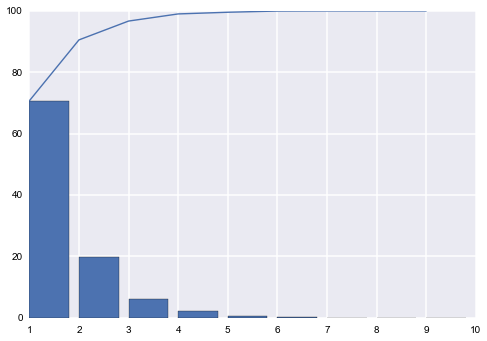

In [13]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print cum_var_exp

trace1 = plt.bar(
        left=[i for i in range(1,10)],
        height=var_exp)

trace2 = plt.plot(
        [i for i in range(1,10)], 
        cum_var_exp,
        label='cumulative explained variance')

plt.ylim(0,100)
plt.show()

### Projection Matrix

In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(9,1), 
                      eig_pairs[1][1].reshape(9,1)))

print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[-0.20030876,  0.63771992],
       [-0.29116559,  0.48459491],
       [ 0.3503192 ,  0.25049007],
       [-0.3139701 , -0.43617018],
       [ 0.37450749,  0.03027429],
       [ 0.2939705 ,  0.28428875],
       [ 0.38879072, -0.08404245],
       [ 0.3842011 ,  0.05973259],
       [ 0.35826668, -0.11455848]]))


### Project Onto the New Feature Space

In [18]:
Y = x_std.dot(matrix_w)

In [19]:
len(Y)

736

In [71]:
traces = []

for name in ('BWR', 'VVER', 'RBMK'):

    trace = plt.scatter(
        Y[y==name,0],
        Y[y==name,1],
        mode='markers',
        label=name,
        )
    traces.append(trace)


data = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=data, layout=layout)
py.iplot(fig)

IndexError: too many indices for array

### With Sklearn

In [30]:
#import data
df = pd.read_excel('All_Isotopes_Generated.xlsx', 'Sheet1')

needed_isotopes = ['Reactor', 'Enrichment', 'u234', 'u235', 'u236', 'u238',
                   'pu238', 'pu239', 'pu240', 'pu241', 'pu242']
                   
df = df[needed_isotopes]

# split data table into data X and class labels y
x = df.ix[:,2:].values
reactor = df.ix[:,0].values
enrichment = df.ix[:,1].values

x_std = StandardScaler().fit_transform(x)
#x_std = x

pca_model = PCA(n_components=3)
result = pca_model.fit_transform(x_std)

In [16]:
df_result = pd.DataFrame(result, columns=['PC1', 'PC2', 'PC3'])
df_result['Reactor'] = reactor
df_result['Enrichment'] = enrichment
df_result = df_result[df_result.columns[-2:].append(df_result.columns[:-2])]

In [29]:
df_result

,Reactor,Enrichment,PC1,PC2,PC3
0,BWR,3.0,2.324359,0.640660,-0.300365
1,BWR,3.0,2.159858,0.648795,-0.368817
2,BWR,3.0,1.995028,0.657830,-0.426216
3,BWR,3.0,1.833563,0.669921,-0.476845
4,BWR,3.0,1.672584,0.685542,-0.519843
5,BWR,3.0,1.512188,0.702172,-0.555975
6,BWR,3.0,1.350975,0.717030,-0.583907
7,BWR,3.0,1.190739,0.734377,-0.604427
8,BWR,3.0,1.034071,0.755563,-0.618856
9,BWR,3.0,0.876613,0.775045,-0.625761


In [17]:
df_result.to_csv('gernerated_PCA_data.csv')

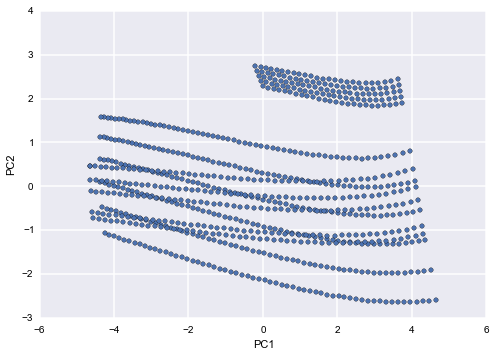

In [28]:
df_result.plot(kind='scatter', x='PC1', y='PC2')

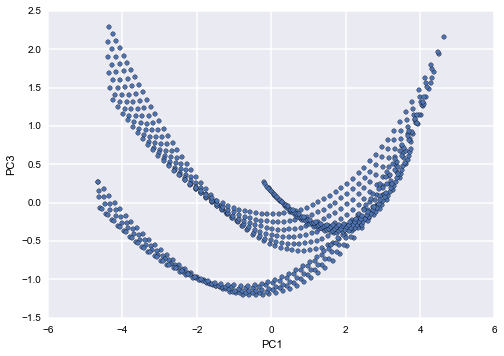

In [26]:
df_result.plot(kind='scatter', x='PC1', y='PC3')

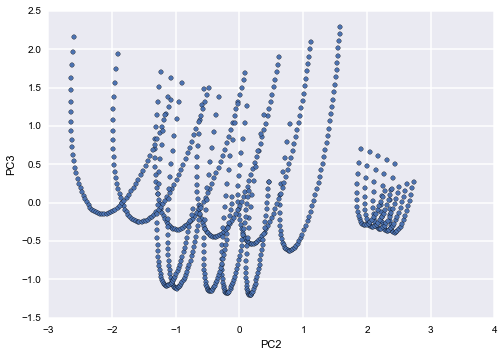

In [27]:
df_result.plot(kind='scatter', x='PC2', y='PC3')

In [7]:
df = pd.read_csv('marakova-table-7-rbmk-spent-fuel-wo-uncertainty.csv')

In [16]:
df

,Sampleno.,u234,u235,u236,u238,pu238,pu239,pu240,pu241,pu242
0,1,0.0886,4.865,2.070,969.8,0.02920,2.615,1.644,0.511,0.2220
1,2,0.0844,2.597,2.320,965.5,0.04750,2.374,2.069,0.607,0.4290
2,3,0.0810,2.675,2.300,964.7,0.05280,2.595,2.226,0.650,0.4550
3,4,0.0906,3.570,2.180,970.2,0.03260,2.351,1.728,0.498,0.2730
4,5,0.0980,5.050,2.020,971.8,0.02450,2.505,1.526,0.455,0.1820
5,6,0.0840,2.230,2.330,967.6,0.04790,2.338,2.035,0.584,0.4340
6,7,0.0900,2.440,2.470,963.0,0.06470,2.405,2.134,0.634,0.4660
7,8,0.0960,4.050,2.140,970.7,0.03050,2.292,1.518,0.440,0.2091
8,9,0.1030,7.280,1.740,974.7,0.01280,2.290,1.165,0.315,0.0861
9,10,0.1160,11.236,1.080,977.7,0.00306,2.136,0.518,0.117,0.0130


In [23]:
pd.DataFrame(df.iloc[-1,:]).T

,Sampleno.,u234,u235,u236,u238,pu238,pu239,pu240,pu241,pu242
40,41,0.239,3.419,3.84,969.5,0.0228,2.477,0.769,0.214,0.035
